<center><span style="color:crimson;"><span style="font-size:50px;">LINEAR REGRESSION FROM SCRATCH</span>

<span style="font-size:40px;">TABLE OF CONTENTS:</span>

* <span style="font-size:30px;">What is Linear Regression</span>
* <span style="font-size:30px;">R2 & Adjusted R2</span>
* <span style="font-size:30px;">WORKING ON S SAMPLE DATASET</span>
* <span style="font-size:30px;">What is Multiple Linear Regression</span>
* <span style="font-size:30px;">Multi-Colinearity</span>

----

<center><b><span style="font-size:30px;">WHAT IS LINEAR REGRESSION ? 
    
    
![](https://littleml.files.wordpress.com/2019/03/introduction_linear.jpg)    

<span style="font-size:24px;">Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:

* <span style="font-size:22px;">Discreet/continuous independent variables

* <span style="font-size:22px;">A best-fit regression line

* <span style="font-size:22px;">Continuous dependent variable. i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. The equation of the Linear Regression is:
    
<center><span style="font-size:20px;">Y= 𝛽1x + 𝛽0</center>
    
* <span style="font-size:20px;">𝛽0  and  𝛽1  are the model coefficients. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Target Feature.
    

## UNDERLYING ASSUMPTIONS
    
* <span style="font-size:20px;">The regression model is linear in terms of coefficients and error term.
    
* <span style="font-size:20px;">The mean of the residuals is zero.
* <span style="font-size:20px;">The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* <span style="font-size:20px;">The independent variables(x) are uncorrelated with the residual term, also termed as exogeneity. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* <span style="font-size:20px;">The error terms have a constant variance, i.e. homoscedasticity.
* <span style="font-size:20px;">No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* <span style="font-size:20px;">The error terms are normally distributed.</span>
    
    
## How Do you Know this is the best fit line? 

<span style="font-size:20px;">The best fit line is obtained by minimizing the residual. Residual is the distance between the actual Y and the predicted Y.</span>
    
## How Well Does the Model Fit the data?

<span style="font-size:20px;">One of the most generic way to evaluate the fit of a linear model is by computing the R-squared value.</span>

-----

<center><b><span style="font-size:30px;">R2 & ADJUSTED R2

<span style="font-size:26px;"><b>R-SQUARE:</b>

* <span style="font-size:24px;">R-squared, also known as the coefficient determination, defines the degree to which the variance in the dependent variable (or target) can be explained by the independent variable (features).
* <span style="font-size:24px;">It lies between value 0 and 1.
* <span style="font-size:24px;">For example, 𝑅2 statistic = 0.75, it says that our model fits 75 % of the total data set.
* <span style="font-size:24px;">So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model.
* <span style="font-size:24px;">The R-squared is calculated by dividing sum of squares of residuals from the regression model (given by RSS) by total sum of squares of errors from the average model (given by TSS) and then subtract it from 1.

<center><span style="color:crimson;"><span style="font-size:24px;">R2 = 1 - RSS/TSS</center>

* <span style="font-size:24px;">One drawback of r-squared is that it assumes every variable helps in explaining the variation in the target, which might not always be true. For instance, if we add a new features to the data (which may or may not be useful), the r-squared value for the model would either increase or remain same but it would never decrease.
    
<span style="font-size:26px;"><b>ADJUSTED R-SQUARE:</b>
    
* <span style="font-size:24px;">To rectify this DRAWBACK, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
    
<center><span style="color:crimson;"><span style="font-size:24px;">Adjusted R2 = 1 - ([1-R2][N-1])/(N-P-1)</center>

-----

<center><b><span style="font-size:30px;">SIMPLE LINEAR REGRESSION IMPLEMENTATION

## PROBLEM STATEMENT: 

<span style="font-size:24px;">THE DATASET CONSISTS OF TWO COLUMNS - EXPERIENCE AND SALARY(TARGET VARIABLE).
    
##### SOURCE : KRISH NAIK SIR.

In [71]:
#IMPORT REQUIRED LIBRARIES:

# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [72]:
df = pd.read_csv('../input/random-salary-data-of-employes-age-wise/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [75]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

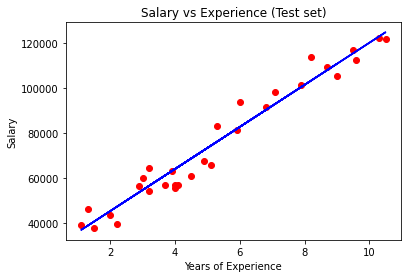

In [76]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')


# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<span style="font-size:30px;">THIS FIGURE SHOW THE BEST FIT LINE ON THIS DATASET. THIS IS HOW THE REGRESSION MODEL WORKS.

In [77]:
#LET US CALCULATE THE R2 VALUE:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9381900012894278
Coefficient of determination R^2 <-- on test set: 0.9749154407708353


----------------------------


    
![](https://i.morioh.com/2020/04/14/74bd389a2f28.jpg)

* <span style="font-size:24px;">The steps to perform simple and multiple linear regression are almost the same, the difference lies in the Evaluation.
* <span style="font-size:24px;">In Multiple Regression we use more than one feature for predicting the Target Variable.

<center><b><span style="font-size:30px;">MULTIPLE LINEAR REGRESSION IMPLEMENTATION

In [78]:
#IMPORT REQUIRED LIBRARIES:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
df = pd.read_csv('../input/various-expenses-and-the-profits-of-50-startups/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [80]:
X = df.iloc[:, :-1]
y = df.iloc[:, 4]

In [81]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)

In [82]:
# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)

In [83]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [84]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9347068473282423


-----------

<center><b><span style="font-size:30px;">MULTI-COLINEARITY

* <span style="font-size:22px;">Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.

* <span style="font-size:22px;">The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other.

* <span style="font-size:22px;">For e.g., Let’s consider this equation  <b>𝑎+𝑏=1=>𝑏=1−𝑎</b>. It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ changes, automatically the value of ‘b’ will also change. This equation denotes a simple linear relationship among two variables.

* <span style="font-size:22px;">We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

* <span style="font-size:22px;">TYPES OF CORRELATION:
                        1. High Correlation: 0.5 to 1.0 or -0.5 to 1.0
                        2. Medium Corr     : 0.3 to 0.5 or -0.3 to 0.5
                        3. Low Correlation : 0.1 to 0.3 or -0.1 to 0.3
    
    
* <span style="font-size:22px;">How we can DETECT Multi-Colinearity:
    
    * <span style="font-size:20px;">1. Correlation Matrix
    * <span style="font-size:20px;">2. Variance Inflation Factor = 1 / [1 - R_SQUARE]


<span style="font-size:24px;"><b>FOR IMPLEMENTATION PART YOU CAN REFER BELOW LINK:</b>
    
<span style="font-size:22px;">https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

----

<center><span style="font-size:24px;"><b>CONCLUSION
    
-----

* <span style="font-size:24px;">THIS NOTEBOOK IS CREATED FOR EVERYONE WHO WANTS TO LEARN LINEAR REGRESSION FROM SCRATCH. IN THIS I HAVE EXPLAINED EVERYTHING WITH SAMPLE DATASETS.
    
    
* <span style="font-size:24px;">IN MY NEXT NOTEBOOK I'LL BE CONTINUING THIS NOTEBOOK BY EXPLAINING REGULARIZATION FROM SCRATCH.
    
    
<span style="font-size:24px;"><b>HOPE THIS WILL HELP YOU TO UNDERSTAND. IF YOU HAVE ANY QUERIES PLEASE MENTION THEM IN COMMENT BOX I'LL DEFINITELY ANSWERING THEM.
    
    
    
<span style="font-size:24px;"><b>IF YOU LIKE AND LEARN FROM THIS, PLEASE GIVE ME AN UPVOTE. THANK YOU !!!